In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [24]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_24'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [3]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [4]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [7]:
gross_tem = df_gross[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]

In [85]:
gross_tem_oneValue = gross_tem[[ 'T6']]

In [86]:
gross_tem_oneValue

,T6
0,24.7534
1,24.7534
2,24.8548
3,24.8887
4,24.8887
...,...
1291,24.5166
1292,24.5504
1293,24.5843
1294,24.5504


/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fada8517410>)

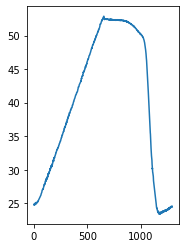

In [87]:
fig = plt.figure(1)
ax = fig.add_subplot(121)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotObject(df, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    #df = df.iloc[:, 3:]
    for i in range (0, df.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df.index, df.iloc[:, i],\
                label = 'Layer ' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject(gross_tem_oneValue, ax, fig, alpha =0.7, scm=None)

In [88]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm_dis, scaler = normalize(gross_tem_oneValue)
df_nrm_dis = pd.DataFrame(df_nrm_dis)
#df_nrm.columns = chargingIn_df.columns

df_nrm_dis.columns = [ 'T6']
df_nrm_dis


,T6
0,0.045891
1,0.045891
2,0.049331
3,0.050481
4,0.050481
...,...
1291,0.037858
1292,0.039004
1293,0.040154
1294,0.039004


In [94]:
k =3
n_features = 2
#out_features = y_train.shape[1]
#out_features
epochs =5000
batch_size = 500

In [95]:
def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    #arr = np.ndarray.flatten(np.array(df))
    #append(arr,)
    
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys

In [96]:

Xdf1, ydf1 = prepare_df(df_nrm_dis)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(1293, 3)

In [97]:
ydf1.shape

(1293, 1)

In [98]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)

    #plt.legend(loc='upper left')
    return fig, ax


In [99]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [100]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [109]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [110]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(16, input_shape = (time_steps, n_features), kernel_regularizer=l2(0.01), \
                   recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    #model.add(LSTM(64))
   # model.add(Dense(30, activation='relu'))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [111]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyOneTemT.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_accuracy",
                                   save_best_only=True,
                           
                                   mode="min")]

In [112]:
X_train.shape
#y_train.shape

(1163, 3)

In [113]:
k =3
n_features = 1
#out_features = y_train.shape[1]
#out_features
epochs =3000
batch_size = 50

In [114]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)
ax.legend(bbox_to_anchor=(0.5,0.8))

Train on 814 samples, validate on 349 samples
Epoch 1/3000
814/814 [==============================] - 1s 2ms/step - loss: 0.8014 - accuracy: 0.0000e+00 - val_loss: 0.5845 - val_accuracy: 0.0029
Epoch 2/3000
814/814 [==============================] - 0s 160us/step - loss: 0.6226 - accuracy: 0.0000e+00 - val_loss: 0.4650 - val_accuracy: 0.0029
Epoch 3/3000
814/814 [==============================] - 0s 200us/step - loss: 0.4755 - accuracy: 0.0000e+00 - val_loss: 0.3745 - val_accuracy: 0.0029
Epoch 4/3000
814/814 [==============================] - 0s 188us/step - loss: 0.3698 - accuracy: 0.0012 - val_loss: 0.3157 - val_accuracy: 0.0029
Epoch 5/3000
814/814 [==============================] - 0s 153us/step - loss: 0.3054 - accuracy: 0.0025 - val_loss: 0.2841 - val_accuracy: 0.0029
Epoch 6/3000
814/814 [==============================] - 0s 190us/step - loss: 0.2701 - accuracy: 0.0012 - val_loss: 0.2640 - val_accuracy: 0.0029
Epoch 7/3000
814/814 [==============================] - 0s 178us/ste

814/814 [==============================] - 0s 199us/step - loss: 0.0368 - accuracy: 0.0025 - val_loss: 0.0283 - val_accuracy: 0.0029
Epoch 57/3000
814/814 [==============================] - 0s 190us/step - loss: 0.0355 - accuracy: 0.0025 - val_loss: 0.0273 - val_accuracy: 0.0029
Epoch 58/3000
814/814 [==============================] - 0s 228us/step - loss: 0.0354 - accuracy: 0.0025 - val_loss: 0.0265 - val_accuracy: 0.0029
Epoch 59/3000
814/814 [==============================] - 0s 215us/step - loss: 0.0341 - accuracy: 0.0025 - val_loss: 0.0256 - val_accuracy: 0.0029
Epoch 60/3000
814/814 [==============================] - 0s 178us/step - loss: 0.0334 - accuracy: 0.0025 - val_loss: 0.0247 - val_accuracy: 0.0029
Epoch 61/3000
814/814 [==============================] - 0s 199us/step - loss: 0.0315 - accuracy: 0.0025 - val_loss: 0.0239 - val_accuracy: 0.0029
Epoch 62/3000
814/814 [==============================] - 0s 225us/step - loss: 0.0320 - accuracy: 0.0025 - val_loss: 0.0233 - val_ac

Epoch 112/3000
814/814 [==============================] - 0s 222us/step - loss: 0.0145 - accuracy: 0.0025 - val_loss: 0.0094 - val_accuracy: 0.0029
Epoch 113/3000
814/814 [==============================] - 0s 216us/step - loss: 0.0149 - accuracy: 0.0025 - val_loss: 0.0095 - val_accuracy: 0.0029
Epoch 114/3000
814/814 [==============================] - 0s 258us/step - loss: 0.0143 - accuracy: 0.0025 - val_loss: 0.0093 - val_accuracy: 0.0029
Epoch 115/3000
814/814 [==============================] - 0s 263us/step - loss: 0.0145 - accuracy: 0.0025 - val_loss: 0.0091 - val_accuracy: 0.0029
Epoch 116/3000
814/814 [==============================] - 0s 204us/step - loss: 0.0144 - accuracy: 0.0025 - val_loss: 0.0090 - val_accuracy: 0.0029
Epoch 117/3000
814/814 [==============================] - 0s 254us/step - loss: 0.0143 - accuracy: 0.0025 - val_loss: 0.0090 - val_accuracy: 0.0029
Epoch 118/3000
814/814 [==============================] - 0s 290us/step - loss: 0.0148 - accuracy: 0.0025 - val_

814/814 [==============================] - 0s 305us/step - loss: 0.0098 - accuracy: 0.0025 - val_loss: 0.0067 - val_accuracy: 0.0029
Epoch 168/3000
814/814 [==============================] - 0s 328us/step - loss: 0.0100 - accuracy: 0.0025 - val_loss: 0.0067 - val_accuracy: 0.0029
Epoch 169/3000
814/814 [==============================] - 0s 241us/step - loss: 0.0105 - accuracy: 0.0025 - val_loss: 0.0064 - val_accuracy: 0.0029
Epoch 170/3000
814/814 [==============================] - 0s 260us/step - loss: 0.0095 - accuracy: 0.0025 - val_loss: 0.0065 - val_accuracy: 0.0029
Epoch 171/3000
814/814 [==============================] - 0s 221us/step - loss: 0.0099 - accuracy: 0.0025 - val_loss: 0.0064 - val_accuracy: 0.0029
Epoch 172/3000
814/814 [==============================] - 0s 170us/step - loss: 0.0100 - accuracy: 0.0025 - val_loss: 0.0067 - val_accuracy: 0.0029
Epoch 173/3000
814/814 [==============================] - 0s 180us/step - loss: 0.0095 - accuracy: 0.0025 - val_loss: 0.0064 - 

814/814 [==============================] - 0s 199us/step - loss: 0.0082 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0029
Epoch 223/3000
814/814 [==============================] - 0s 172us/step - loss: 0.0074 - accuracy: 0.0025 - val_loss: 0.0052 - val_accuracy: 0.0029
Epoch 224/3000
814/814 [==============================] - 0s 216us/step - loss: 0.0082 - accuracy: 0.0025 - val_loss: 0.0053 - val_accuracy: 0.0029
Epoch 225/3000
814/814 [==============================] - 0s 181us/step - loss: 0.0081 - accuracy: 0.0025 - val_loss: 0.0053 - val_accuracy: 0.0029
Epoch 226/3000
814/814 [==============================] - 0s 152us/step - loss: 0.0077 - accuracy: 0.0025 - val_loss: 0.0053 - val_accuracy: 0.0029
Epoch 227/3000
814/814 [==============================] - 0s 171us/step - loss: 0.0076 - accuracy: 0.0025 - val_loss: 0.0051 - val_accuracy: 0.0029
Epoch 228/3000
814/814 [==============================] - 0s 215us/step - loss: 0.0078 - accuracy: 0.0025 - val_loss: 0.0050 - 

814/814 [==============================] - 0s 198us/step - loss: 0.0063 - accuracy: 0.0025 - val_loss: 0.0042 - val_accuracy: 0.0029
Epoch 278/3000
814/814 [==============================] - 0s 190us/step - loss: 0.0062 - accuracy: 0.0025 - val_loss: 0.0042 - val_accuracy: 0.0029
Epoch 279/3000
814/814 [==============================] - 0s 165us/step - loss: 0.0067 - accuracy: 0.0025 - val_loss: 0.0040 - val_accuracy: 0.0029
Epoch 280/3000
814/814 [==============================] - 0s 169us/step - loss: 0.0065 - accuracy: 0.0025 - val_loss: 0.0043 - val_accuracy: 0.0029
Epoch 281/3000
814/814 [==============================] - 0s 187us/step - loss: 0.0067 - accuracy: 0.0025 - val_loss: 0.0041 - val_accuracy: 0.0029
Epoch 282/3000
814/814 [==============================] - 0s 180us/step - loss: 0.0063 - accuracy: 0.0025 - val_loss: 0.0043 - val_accuracy: 0.0029
Epoch 283/3000
814/814 [==============================] - 0s 152us/step - loss: 0.0069 - accuracy: 0.0025 - val_loss: 0.0039 - 

814/814 [==============================] - 0s 158us/step - loss: 0.0061 - accuracy: 0.0025 - val_loss: 0.0034 - val_accuracy: 0.0029
Epoch 333/3000
814/814 [==============================] - 0s 145us/step - loss: 0.0055 - accuracy: 0.0025 - val_loss: 0.0035 - val_accuracy: 0.0029
Epoch 334/3000
814/814 [==============================] - 0s 193us/step - loss: 0.0058 - accuracy: 0.0025 - val_loss: 0.0032 - val_accuracy: 0.0029
Epoch 335/3000
814/814 [==============================] - 0s 157us/step - loss: 0.0058 - accuracy: 0.0025 - val_loss: 0.0032 - val_accuracy: 0.0029
Epoch 336/3000
814/814 [==============================] - 0s 189us/step - loss: 0.0055 - accuracy: 0.0025 - val_loss: 0.0035 - val_accuracy: 0.0029
Epoch 337/3000
814/814 [==============================] - 0s 169us/step - loss: 0.0054 - accuracy: 0.0025 - val_loss: 0.0033 - val_accuracy: 0.0029
Epoch 338/3000
814/814 [==============================] - 0s 217us/step - loss: 0.0055 - accuracy: 0.0025 - val_loss: 0.0034 - 

814/814 [==============================] - 0s 219us/step - loss: 0.0050 - accuracy: 0.0025 - val_loss: 0.0028 - val_accuracy: 0.0029
Epoch 388/3000
814/814 [==============================] - 0s 342us/step - loss: 0.0051 - accuracy: 0.0025 - val_loss: 0.0031 - val_accuracy: 0.0029
Epoch 389/3000
814/814 [==============================] - 0s 350us/step - loss: 0.0053 - accuracy: 0.0025 - val_loss: 0.0030 - val_accuracy: 0.0029
Epoch 390/3000
814/814 [==============================] - 0s 266us/step - loss: 0.0051 - accuracy: 0.0025 - val_loss: 0.0025 - val_accuracy: 0.0029
Epoch 391/3000
814/814 [==============================] - 0s 374us/step - loss: 0.0049 - accuracy: 0.0025 - val_loss: 0.0028 - val_accuracy: 0.0029
Epoch 392/3000
814/814 [==============================] - 0s 352us/step - loss: 0.0050 - accuracy: 0.0025 - val_loss: 0.0026 - val_accuracy: 0.0029
Epoch 393/3000
814/814 [==============================] - 0s 276us/step - loss: 0.0052 - accuracy: 0.0025 - val_loss: 0.0026 - 

814/814 [==============================] - 0s 362us/step - loss: 0.0047 - accuracy: 0.0025 - val_loss: 0.0021 - val_accuracy: 0.0029
Epoch 443/3000
814/814 [==============================] - 0s 241us/step - loss: 0.0047 - accuracy: 0.0025 - val_loss: 0.0025 - val_accuracy: 0.0029
Epoch 444/3000
814/814 [==============================] - 0s 317us/step - loss: 0.0045 - accuracy: 0.0025 - val_loss: 0.0023 - val_accuracy: 0.0029
Epoch 445/3000
814/814 [==============================] - 0s 574us/step - loss: 0.0050 - accuracy: 0.0025 - val_loss: 0.0023 - val_accuracy: 0.0029
Epoch 446/3000
814/814 [==============================] - 0s 440us/step - loss: 0.0046 - accuracy: 0.0025 - val_loss: 0.0024 - val_accuracy: 0.0029
Epoch 447/3000
814/814 [==============================] - 0s 297us/step - loss: 0.0049 - accuracy: 0.0025 - val_loss: 0.0022 - val_accuracy: 0.0029
Epoch 448/3000
814/814 [==============================] - 0s 195us/step - loss: 0.0045 - accuracy: 0.0025 - val_loss: 0.0021 - 

814/814 [==============================] - 0s 189us/step - loss: 0.0042 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0029
Epoch 498/3000
814/814 [==============================] - 0s 165us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0021 - val_accuracy: 0.0029
Epoch 499/3000
814/814 [==============================] - 0s 156us/step - loss: 0.0046 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0029
Epoch 500/3000
814/814 [==============================] - 0s 208us/step - loss: 0.0046 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0029
Epoch 501/3000
814/814 [==============================] - 0s 187us/step - loss: 0.0042 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0029
Epoch 502/3000
814/814 [==============================] - 0s 169us/step - loss: 0.0045 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0029
Epoch 503/3000
814/814 [==============================] - 0s 162us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 0.0019 - 

814/814 [==============================] - 0s 198us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0029
Epoch 553/3000
814/814 [==============================] - 0s 292us/step - loss: 0.0042 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0029
Epoch 554/3000
814/814 [==============================] - 0s 244us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0029
Epoch 555/3000
814/814 [==============================] - 0s 336us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0029
Epoch 556/3000
814/814 [==============================] - 0s 238us/step - loss: 0.0043 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0029
Epoch 557/3000
814/814 [==============================] - 0s 194us/step - loss: 0.0043 - accuracy: 0.0025 - val_loss: 0.0023 - val_accuracy: 0.0029
Epoch 558/3000
814/814 [==============================] - 0s 125us/step - loss: 0.0044 - accuracy: 0.0025 - val_loss: 0.0015 - 

814/814 [==============================] - 0s 273us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 608/3000
814/814 [==============================] - 0s 285us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0022 - val_accuracy: 0.0029
Epoch 609/3000
814/814 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.00 - 0s 245us/step - loss: 0.0044 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 610/3000
814/814 [==============================] - 0s 186us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0029
Epoch 611/3000
814/814 [==============================] - 0s 183us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 612/3000
814/814 [==============================] - 0s 195us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 613/3000
814/814 [==============================] - 0s 218us/step - loss: 0.003

814/814 [==============================] - 0s 169us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 663/3000
814/814 [==============================] - 0s 172us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0029
Epoch 664/3000
814/814 [==============================] - 0s 146us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 665/3000
814/814 [==============================] - 0s 207us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.0029
Epoch 666/3000
814/814 [==============================] - 0s 188us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0029
Epoch 667/3000
814/814 [==============================] - 0s 177us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0016 - val_accuracy: 0.0029
Epoch 668/3000
814/814 [==============================] - 0s 178us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.0013 - 

814/814 [==============================] - 0s 148us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 718/3000
814/814 [==============================] - 0s 193us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0029
Epoch 719/3000
814/814 [==============================] - 0s 207us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 720/3000
814/814 [==============================] - 0s 280us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 721/3000
814/814 [==============================] - 0s 195us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 722/3000
814/814 [==============================] - 0s 194us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 9.8077e-04 - val_accuracy: 0.0029
Epoch 723/3000
814/814 [==============================] - 0s 239us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 0.001

814/814 [==============================] - 0s 509us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 9.0274e-04 - val_accuracy: 0.0029
Epoch 773/3000
814/814 [==============================] - 0s 457us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 9.6133e-04 - val_accuracy: 0.0029
Epoch 774/3000
814/814 [==============================] - 0s 203us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 775/3000
814/814 [==============================] - 0s 318us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0029
Epoch 776/3000
814/814 [==============================] - 0s 256us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 777/3000
814/814 [==============================] - 0s 192us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 778/3000
814/814 [==============================] - 0s 199us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8

Epoch 827/3000
814/814 [==============================] - 0s 199us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0029
Epoch 828/3000
814/814 [==============================] - 0s 199us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 8.6118e-04 - val_accuracy: 0.0029
Epoch 829/3000
814/814 [==============================] - 0s 302us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 830/3000
814/814 [==============================] - 0s 222us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 8.8042e-04 - val_accuracy: 0.0029
Epoch 831/3000
814/814 [==============================] - 0s 203us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 832/3000
814/814 [==============================] - 0s 263us/step - loss: 0.0040 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 833/3000
814/814 [==============================] - 0s 223us/step - loss: 0.0034 - accuracy: 0.002

Epoch 882/3000
814/814 [==============================] - 0s 202us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 9.4548e-04 - val_accuracy: 0.0029
Epoch 883/3000
814/814 [==============================] - 0s 159us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 884/3000
814/814 [==============================] - 0s 197us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 885/3000
814/814 [==============================] - 0s 190us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 8.0329e-04 - val_accuracy: 0.0029
Epoch 886/3000
814/814 [==============================] - 0s 199us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 887/3000
814/814 [==============================] - 0s 154us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.8797e-04 - val_accuracy: 0.0029
Epoch 888/3000
814/814 [==============================] - 0s 203us/step - loss: 0.0039 - accuracy: 0

814/814 [==============================] - 0s 250us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 7.9379e-04 - val_accuracy: 0.0029
Epoch 937/3000
814/814 [==============================] - 0s 150us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 9.5645e-04 - val_accuracy: 0.0029
Epoch 938/3000
814/814 [==============================] - 0s 242us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.3066e-04 - val_accuracy: 0.0029
Epoch 939/3000
814/814 [==============================] - 0s 197us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 7.3546e-04 - val_accuracy: 0.0029
Epoch 940/3000
814/814 [==============================] - 0s 198us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 941/3000
814/814 [==============================] - 0s 188us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.4395e-04 - val_accuracy: 0.0029
Epoch 942/3000
814/814 [==============================] - 0s 198us/step - loss: 0.0037 - accuracy: 0.0025 -

814/814 [==============================] - 0s 159us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.6857e-04 - val_accuracy: 0.0029
Epoch 991/3000
814/814 [==============================] - 0s 210us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.0090e-04 - val_accuracy: 0.0029
Epoch 992/3000
814/814 [==============================] - 0s 172us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 993/3000
814/814 [==============================] - 0s 182us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 7.2791e-04 - val_accuracy: 0.0029
Epoch 994/3000
814/814 [==============================] - 0s 169us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 8.8538e-04 - val_accuracy: 0.0029
Epoch 995/3000
814/814 [==============================] - 0s 197us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 9.0818e-04 - val_accuracy: 0.0029
Epoch 996/3000
814/814 [==============================] - 0s 174us/step - loss: 0.0032 - accuracy: 0.0025 -

814/814 [==============================] - 0s 183us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.5562e-04 - val_accuracy: 0.0029
Epoch 1045/3000
814/814 [==============================] - 0s 226us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 1046/3000
814/814 [==============================] - 0s 170us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 9.2214e-04 - val_accuracy: 0.0029
Epoch 1047/3000
814/814 [==============================] - 0s 216us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 1048/3000
814/814 [==============================] - 0s 153us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.2543e-04 - val_accuracy: 0.0029
Epoch 1049/3000
814/814 [==============================] - 0s 229us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 1050/3000
814/814 [==============================] - 0s 149us/step - loss: 0.0033 - accuracy: 0.0025 - v

814/814 [==============================] - 0s 213us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.8697e-04 - val_accuracy: 0.0029
Epoch 1099/3000
814/814 [==============================] - 0s 149us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 9.7138e-04 - val_accuracy: 0.0029
Epoch 1100/3000
814/814 [==============================] - 0s 212us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.5134e-04 - val_accuracy: 0.0029
Epoch 1101/3000
814/814 [==============================] - 0s 141us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.0368e-04 - val_accuracy: 0.0029
Epoch 1102/3000
814/814 [==============================] - 0s 173us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.7964e-04 - val_accuracy: 0.0029
Epoch 1103/3000
814/814 [==============================] - 0s 137us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 1104/3000
814/814 [==============================] - 0s 220us/step - loss: 0.0035 - accuracy: 0.

814/814 [==============================] - 0s 230us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.6533e-04 - val_accuracy: 0.0029
Epoch 1153/3000
814/814 [==============================] - 0s 234us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.6682e-04 - val_accuracy: 0.0029
Epoch 1154/3000
814/814 [==============================] - 0s 224us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.6892e-04 - val_accuracy: 0.0029
Epoch 1155/3000
814/814 [==============================] - 0s 205us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 7.1350e-04 - val_accuracy: 0.0029
Epoch 1156/3000
814/814 [==============================] - 0s 194us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0029
Epoch 1157/3000
814/814 [==============================] - 0s 166us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.3614e-04 - val_accuracy: 0.0029
Epoch 1158/3000
814/814 [==============================] - 0s 264us/step - loss: 0.0031 - accuracy: 0.

Epoch 1206/3000
814/814 [==============================] - 0s 219us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.9046e-04 - val_accuracy: 0.0029
Epoch 1207/3000
814/814 [==============================] - 0s 582us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.9779e-04 - val_accuracy: 0.0029
Epoch 1208/3000
814/814 [==============================] - 0s 133us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 8.4009e-04 - val_accuracy: 0.0029
Epoch 1209/3000
814/814 [==============================] - 0s 167us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 5.5002e-04 - val_accuracy: 0.0029
Epoch 1210/3000
814/814 [==============================] - 0s 162us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 8.3470e-04 - val_accuracy: 0.0029
Epoch 1211/3000
814/814 [==============================] - 0s 184us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 8.7051e-04 - val_accuracy: 0.0029
Epoch 1212/3000
814/814 [==============================] - 0s 179us/step - loss: 0

Epoch 1260/3000
814/814 [==============================] - 0s 230us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.0603e-04 - val_accuracy: 0.0029
Epoch 1261/3000
814/814 [==============================] - 0s 206us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.2164e-04 - val_accuracy: 0.0029
Epoch 1262/3000
814/814 [==============================] - 0s 179us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 7.0924e-04 - val_accuracy: 0.0029
Epoch 1263/3000
814/814 [==============================] - 0s 184us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.2968e-04 - val_accuracy: 0.0029
Epoch 1264/3000
814/814 [==============================] - 0s 195us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 7.1714e-04 - val_accuracy: 0.0029
Epoch 1265/3000
814/814 [==============================] - 0s 194us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.6475e-04 - val_accuracy: 0.0029
Epoch 1266/3000
814/814 [==============================] - 0s 184us/step - loss: 0

Epoch 1314/3000
814/814 [==============================] - 0s 150us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.4646e-04 - val_accuracy: 0.0029
Epoch 1315/3000
814/814 [==============================] - 0s 196us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.9909e-04 - val_accuracy: 0.0029
Epoch 1316/3000
814/814 [==============================] - 0s 176us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.0124e-04 - val_accuracy: 0.0029
Epoch 1317/3000
814/814 [==============================] - 0s 200us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.8731e-04 - val_accuracy: 0.0029
Epoch 1318/3000
814/814 [==============================] - 0s 173us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.7022e-04 - val_accuracy: 0.0029
Epoch 1319/3000
814/814 [==============================] - 0s 206us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 1320/3000
814/814 [==============================] - 0s 162us/step - loss: 0.003

Epoch 1368/3000
814/814 [==============================] - 0s 263us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 8.7175e-04 - val_accuracy: 0.0029
Epoch 1369/3000
814/814 [==============================] - 0s 228us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.8354e-04 - val_accuracy: 0.0029
Epoch 1370/3000
814/814 [==============================] - 0s 159us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.3111e-04 - val_accuracy: 0.0029
Epoch 1371/3000
814/814 [==============================] - 0s 291us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.9228e-04 - val_accuracy: 0.0029
Epoch 1372/3000
814/814 [==============================] - 0s 173us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.0729e-04 - val_accuracy: 0.0029
Epoch 1373/3000
814/814 [==============================] - 0s 171us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 5.1056e-04 - val_accuracy: 0.0029
Epoch 1374/3000
814/814 [==============================] - 0s 183us/step - loss: 0

Epoch 1422/3000
814/814 [==============================] - 0s 176us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.3856e-04 - val_accuracy: 0.0029
Epoch 1423/3000
814/814 [==============================] - 0s 246us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.0485e-04 - val_accuracy: 0.0029
Epoch 1424/3000
814/814 [==============================] - 0s 187us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.0039e-04 - val_accuracy: 0.0029
Epoch 1425/3000
814/814 [==============================] - 0s 270us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 4.9557e-04 - val_accuracy: 0.0029
Epoch 1426/3000
814/814 [==============================] - 0s 194us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 1427/3000
814/814 [==============================] - 0s 263us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.5242e-04 - val_accuracy: 0.0029
Epoch 1428/3000
814/814 [==============================] - 0s 186us/step - loss: 0.003

Epoch 1476/3000
814/814 [==============================] - 0s 212us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.5402e-04 - val_accuracy: 0.0029
Epoch 1477/3000
814/814 [==============================] - 0s 260us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.9106e-04 - val_accuracy: 0.0029
Epoch 1478/3000
814/814 [==============================] - 0s 513us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.6588e-04 - val_accuracy: 0.0029
Epoch 1479/3000
814/814 [==============================] - 0s 276us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.2285e-04 - val_accuracy: 0.0029
Epoch 1480/3000
814/814 [==============================] - 0s 154us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.1189e-04 - val_accuracy: 0.0029
Epoch 1481/3000
814/814 [==============================] - 0s 147us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.9105e-04 - val_accuracy: 0.0029
Epoch 1482/3000
814/814 [==============================] - 0s 195us/step - loss: 0

Epoch 1530/3000
814/814 [==============================] - 0s 255us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 6.8922e-04 - val_accuracy: 0.0029
Epoch 1531/3000
814/814 [==============================] - 0s 244us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 9.0087e-04 - val_accuracy: 0.0029
Epoch 1532/3000
814/814 [==============================] - 0s 264us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.2949e-04 - val_accuracy: 0.0029
Epoch 1533/3000
814/814 [==============================] - 0s 293us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.0354e-04 - val_accuracy: 0.0029
Epoch 1534/3000
814/814 [==============================] - 0s 248us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 1535/3000
814/814 [==============================] - 0s 278us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.9381e-04 - val_accuracy: 0.0029
Epoch 1536/3000
814/814 [==============================] - 0s 258us/step - loss: 0.003

Epoch 1584/3000
814/814 [==============================] - 0s 193us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.1717e-04 - val_accuracy: 0.0029
Epoch 1585/3000
814/814 [==============================] - 0s 197us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.4708e-04 - val_accuracy: 0.0029
Epoch 1586/3000
814/814 [==============================] - 0s 225us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 9.9582e-04 - val_accuracy: 0.0029
Epoch 1587/3000
814/814 [==============================] - 0s 181us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.3415e-04 - val_accuracy: 0.0029
Epoch 1588/3000
814/814 [==============================] - 0s 212us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 1589/3000
814/814 [==============================] - 0s 201us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.0594e-04 - val_accuracy: 0.0029
Epoch 1590/3000
814/814 [==============================] - 0s 184us/step - loss: 0.003

Epoch 1638/3000
814/814 [==============================] - 0s 187us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.9596e-04 - val_accuracy: 0.0029
Epoch 1639/3000
814/814 [==============================] - 0s 151us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 8.5089e-04 - val_accuracy: 0.0029
Epoch 1640/3000
814/814 [==============================] - 0s 260us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 1641/3000
814/814 [==============================] - 0s 157us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.8022e-04 - val_accuracy: 0.0029
Epoch 1642/3000
814/814 [==============================] - 0s 242us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 9.5551e-04 - val_accuracy: 0.0029
Epoch 1643/3000
814/814 [==============================] - 0s 208us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.6786e-04 - val_accuracy: 0.0029
Epoch 1644/3000
814/814 [==============================] - 0s 190us/step - loss: 0.003

Epoch 1692/3000
814/814 [==============================] - 0s 183us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.6668e-04 - val_accuracy: 0.0029
Epoch 1693/3000
814/814 [==============================] - 0s 167us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.9902e-04 - val_accuracy: 0.0029
Epoch 1694/3000
814/814 [==============================] - 0s 180us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.9019e-04 - val_accuracy: 0.0029
Epoch 1695/3000
814/814 [==============================] - 0s 181us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 1696/3000
814/814 [==============================] - 0s 179us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.6524e-04 - val_accuracy: 0.0029
Epoch 1697/3000
814/814 [==============================] - 0s 167us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.4634e-04 - val_accuracy: 0.0029
Epoch 1698/3000
814/814 [==============================] - 0s 255us/step - loss: 0.003

814/814 [==============================] - 0s 155us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 1746/3000
814/814 [==============================] - 0s 241us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.1224e-04 - val_accuracy: 0.0029
Epoch 1747/3000
814/814 [==============================] - 0s 173us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 8.6701e-04 - val_accuracy: 0.0029
Epoch 1748/3000
814/814 [==============================] - 0s 210us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.8384e-04 - val_accuracy: 0.0029
Epoch 1749/3000
814/814 [==============================] - 0s 200us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.8972e-04 - val_accuracy: 0.0029
Epoch 1750/3000
814/814 [==============================] - 0s 178us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.7389e-04 - val_accuracy: 0.0029
Epoch 1751/3000
814/814 [==============================] - 0s 185us/step - loss: 0.0030 - accuracy: 0.

Epoch 1799/3000
814/814 [==============================] - 0s 291us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 9.1717e-04 - val_accuracy: 0.0029
Epoch 1800/3000
814/814 [==============================] - 0s 166us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 8.0014e-04 - val_accuracy: 0.0029
Epoch 1801/3000
814/814 [==============================] - 0s 212us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.8618e-04 - val_accuracy: 0.0029
Epoch 1802/3000
814/814 [==============================] - 0s 170us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 8.5951e-04 - val_accuracy: 0.0029
Epoch 1803/3000
814/814 [==============================] - 0s 154us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.5508e-04 - val_accuracy: 0.0029
Epoch 1804/3000
814/814 [==============================] - 0s 154us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 8.5147e-04 - val_accuracy: 0.0029
Epoch 1805/3000
814/814 [==============================] - 0s 216us/step - loss: 0

Epoch 1853/3000
814/814 [==============================] - 0s 243us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.5130e-04 - val_accuracy: 0.0029
Epoch 1854/3000
814/814 [==============================] - 0s 183us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0029
Epoch 1855/3000
814/814 [==============================] - 0s 196us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.7426e-04 - val_accuracy: 0.0029
Epoch 1856/3000
814/814 [==============================] - 0s 185us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 1857/3000
814/814 [==============================] - 0s 195us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 3.9363e-04 - val_accuracy: 0.0029
Epoch 1858/3000
814/814 [==============================] - 0s 183us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.4640e-04 - val_accuracy: 0.0029
Epoch 1859/3000
814/814 [==============================] - 0s 189us/step - loss: 0.0033 - 

Epoch 1907/3000
814/814 [==============================] - 0s 164us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.1487e-04 - val_accuracy: 0.0029
Epoch 1908/3000
814/814 [==============================] - 0s 188us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.6470e-04 - val_accuracy: 0.0029
Epoch 1909/3000
814/814 [==============================] - 0s 203us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.7175e-04 - val_accuracy: 0.0029
Epoch 1910/3000
814/814 [==============================] - 0s 215us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.8922e-04 - val_accuracy: 0.0029
Epoch 1911/3000
814/814 [==============================] - 0s 199us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.3883e-04 - val_accuracy: 0.0029
Epoch 1912/3000
814/814 [==============================] - 0s 171us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.4397e-04 - val_accuracy: 0.0029
Epoch 1913/3000
814/814 [==============================] - 0s 200us/step - loss: 0

Epoch 1961/3000
814/814 [==============================] - 0s 182us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.6030e-04 - val_accuracy: 0.0029
Epoch 1962/3000
814/814 [==============================] - 0s 180us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.9934e-04 - val_accuracy: 0.0029
Epoch 1963/3000
814/814 [==============================] - 0s 175us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 1964/3000
814/814 [==============================] - 0s 176us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.8594e-04 - val_accuracy: 0.0029
Epoch 1965/3000
814/814 [==============================] - 0s 223us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 7.7105e-04 - val_accuracy: 0.0029
Epoch 1966/3000
814/814 [==============================] - 0s 195us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.9675e-04 - val_accuracy: 0.0029
Epoch 1967/3000
814/814 [==============================] - 0s 184us/step - loss: 0.003

814/814 [==============================] - 0s 154us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.1448e-04 - val_accuracy: 0.0029
Epoch 2015/3000
814/814 [==============================] - 0s 210us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 9.4383e-04 - val_accuracy: 0.0029
Epoch 2016/3000
814/814 [==============================] - 0s 128us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.9964e-04 - val_accuracy: 0.0029
Epoch 2017/3000
814/814 [==============================] - 0s 214us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.0892e-04 - val_accuracy: 0.0029
Epoch 2018/3000
814/814 [==============================] - 0s 125us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0013 - val_accuracy: 0.0029
Epoch 2019/3000
814/814 [==============================] - 0s 144us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.7048e-04 - val_accuracy: 0.0029
Epoch 2020/3000
814/814 [==============================] - 0s 145us/step - loss: 0.0036 - accuracy: 0.

Epoch 2068/3000
814/814 [==============================] - 0s 219us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 6.8481e-04 - val_accuracy: 0.0029
Epoch 2069/3000
814/814 [==============================] - 0s 209us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.2333e-04 - val_accuracy: 0.0029
Epoch 2070/3000
814/814 [==============================] - 0s 275us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.2912e-04 - val_accuracy: 0.0029
Epoch 2071/3000
814/814 [==============================] - 0s 267us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.1555e-04 - val_accuracy: 0.0029
Epoch 2072/3000
814/814 [==============================] - 0s 233us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.7055e-04 - val_accuracy: 0.0029
Epoch 2073/3000
814/814 [==============================] - 0s 220us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 7.4921e-04 - val_accuracy: 0.0029
Epoch 2074/3000
814/814 [==============================] - 0s 209us/step - loss: 0

814/814 [==============================] - 0s 388us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.9694e-04 - val_accuracy: 0.0029
Epoch 2122/3000
814/814 [==============================] - 0s 314us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.8261e-04 - val_accuracy: 0.0029
Epoch 2123/3000
814/814 [==============================] - 0s 461us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 4.7371e-04 - val_accuracy: 0.0029
Epoch 2124/3000
814/814 [==============================] - 0s 394us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.3878e-04 - val_accuracy: 0.0029
Epoch 2125/3000
814/814 [==============================] - 0s 270us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 7.7858e-04 - val_accuracy: 0.0029
Epoch 2126/3000
814/814 [==============================] - 0s 230us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 2127/3000
814/814 [==============================] - 0s 235us/step - loss: 0.0033 - accuracy: 0.

Epoch 2175/3000
814/814 [==============================] - 0s 204us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 9.0809e-04 - val_accuracy: 0.0029
Epoch 2176/3000
814/814 [==============================] - 0s 175us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.2288e-04 - val_accuracy: 0.0029
Epoch 2177/3000
814/814 [==============================] - 0s 200us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.5665e-04 - val_accuracy: 0.0029
Epoch 2178/3000
814/814 [==============================] - 0s 243us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.5957e-04 - val_accuracy: 0.0029
Epoch 2179/3000
814/814 [==============================] - 0s 203us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 0.0017 - val_accuracy: 0.0029
Epoch 2180/3000
814/814 [==============================] - 0s 228us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 6.2792e-04 - val_accuracy: 0.0029
Epoch 2181/3000
814/814 [==============================] - 0s 143us/step - loss: 0.003

Epoch 2229/3000
814/814 [==============================] - 0s 157us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 4.4674e-04 - val_accuracy: 0.0029
Epoch 2230/3000
814/814 [==============================] - 0s 153us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 8.8612e-04 - val_accuracy: 0.0029
Epoch 2231/3000
814/814 [==============================] - 0s 154us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.9801e-04 - val_accuracy: 0.0029
Epoch 2232/3000
814/814 [==============================] - 0s 179us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.2520e-04 - val_accuracy: 0.0029
Epoch 2233/3000
814/814 [==============================] - 0s 211us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.6024e-04 - val_accuracy: 0.0029
Epoch 2234/3000
814/814 [==============================] - 0s 195us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 5.7667e-04 - val_accuracy: 0.0029
Epoch 2235/3000
814/814 [==============================] - 0s 142us/step - loss: 0

814/814 [==============================] - 0s 172us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.0757e-04 - val_accuracy: 0.0029
Epoch 2283/3000
814/814 [==============================] - 0s 185us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 2284/3000
814/814 [==============================] - 0s 212us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0015 - val_accuracy: 0.0029
Epoch 2285/3000
814/814 [==============================] - 0s 159us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.8105e-04 - val_accuracy: 0.0029
Epoch 2286/3000
814/814 [==============================] - 0s 219us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 2287/3000
814/814 [==============================] - 0s 202us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.4252e-04 - val_accuracy: 0.0029
Epoch 2288/3000
814/814 [==============================] - 0s 255us/step - loss: 0.0029 - accuracy: 0.0025 - v

Epoch 2336/3000
814/814 [==============================] - 0s 152us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.5244e-04 - val_accuracy: 0.0029
Epoch 2337/3000
814/814 [==============================] - 0s 174us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.8604e-04 - val_accuracy: 0.0029
Epoch 2338/3000
814/814 [==============================] - 0s 159us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0029
Epoch 2339/3000
814/814 [==============================] - 0s 155us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.5771e-04 - val_accuracy: 0.0029
Epoch 2340/3000
814/814 [==============================] - 0s 152us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 4.8367e-04 - val_accuracy: 0.0029
Epoch 2341/3000
814/814 [==============================] - 0s 177us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 2342/3000
814/814 [==============================] - 0s 146us/step - loss: 0.0036 - 

Epoch 2390/3000
814/814 [==============================] - 0s 148us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 9.9561e-04 - val_accuracy: 0.0029
Epoch 2391/3000
814/814 [==============================] - 0s 155us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.0844e-04 - val_accuracy: 0.0029
Epoch 2392/3000
814/814 [==============================] - 0s 166us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.7956e-04 - val_accuracy: 0.0029
Epoch 2393/3000
814/814 [==============================] - 0s 171us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 3.4636e-04 - val_accuracy: 0.0029
Epoch 2394/3000
814/814 [==============================] - 0s 148us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.8009e-04 - val_accuracy: 0.0029
Epoch 2395/3000
814/814 [==============================] - 0s 154us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.5213e-04 - val_accuracy: 0.0029
Epoch 2396/3000
814/814 [==============================] - 0s 142us/step - loss: 0

Epoch 2444/3000
814/814 [==============================] - 0s 174us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 6.0879e-04 - val_accuracy: 0.0029
Epoch 2445/3000
814/814 [==============================] - 0s 181us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.6663e-04 - val_accuracy: 0.0029
Epoch 2446/3000
814/814 [==============================] - 0s 185us/step - loss: 0.0027 - accuracy: 0.0025 - val_loss: 8.5051e-04 - val_accuracy: 0.0029
Epoch 2447/3000
814/814 [==============================] - 0s 152us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.4082e-04 - val_accuracy: 0.0029
Epoch 2448/3000
814/814 [==============================] - 0s 179us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 2449/3000
814/814 [==============================] - 0s 206us/step - loss: 0.0038 - accuracy: 0.0025 - val_loss: 4.4026e-04 - val_accuracy: 0.0029
Epoch 2450/3000
814/814 [==============================] - 0s 197us/step - loss: 0.003

Epoch 2498/3000
814/814 [==============================] - 0s 240us/step - loss: 0.0041 - accuracy: 0.0025 - val_loss: 7.5034e-04 - val_accuracy: 0.0029
Epoch 2499/3000
814/814 [==============================] - 0s 231us/step - loss: 0.0039 - accuracy: 0.0025 - val_loss: 7.0794e-04 - val_accuracy: 0.0029
Epoch 2500/3000
814/814 [==============================] - 0s 187us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 0.0014 - val_accuracy: 0.0029
Epoch 2501/3000
814/814 [==============================] - 0s 271us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.7898e-04 - val_accuracy: 0.0029
Epoch 2502/3000
814/814 [==============================] - 0s 393us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 6.3758e-04 - val_accuracy: 0.0029
Epoch 2503/3000
814/814 [==============================] - 0s 213us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 2504/3000
814/814 [==============================] - 0s 266us/step - loss: 0.0033 - 

Epoch 2552/3000
814/814 [==============================] - 0s 194us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.1676e-04 - val_accuracy: 0.0029
Epoch 2553/3000
814/814 [==============================] - 0s 312us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 8.4837e-04 - val_accuracy: 0.0029
Epoch 2554/3000
814/814 [==============================] - 0s 267us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 2555/3000
814/814 [==============================] - 0s 219us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 6.4167e-04 - val_accuracy: 0.0029
Epoch 2556/3000
814/814 [==============================] - 0s 276us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 0.0011 - val_accuracy: 0.0029
Epoch 2557/3000
814/814 [==============================] - 0s 245us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.9145e-04 - val_accuracy: 0.0029
Epoch 2558/3000
814/814 [==============================] - 0s 243us/step - loss: 0.0031 - 

Epoch 2606/3000
814/814 [==============================] - 0s 224us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 5.0808e-04 - val_accuracy: 0.0029
Epoch 2607/3000
814/814 [==============================] - 0s 190us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.1736e-04 - val_accuracy: 0.0029
Epoch 2608/3000
814/814 [==============================] - 0s 189us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 5.1287e-04 - val_accuracy: 0.0029
Epoch 2609/3000
814/814 [==============================] - 0s 248us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 6.6389e-04 - val_accuracy: 0.0029
Epoch 2610/3000
814/814 [==============================] - 0s 219us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 5.9749e-04 - val_accuracy: 0.0029
Epoch 2611/3000
814/814 [==============================] - 0s 196us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.9428e-04 - val_accuracy: 0.0029
Epoch 2612/3000
814/814 [==============================] - 0s 179us/step - loss: 0

Epoch 2660/3000
814/814 [==============================] - 0s 234us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.1304e-04 - val_accuracy: 0.0029
Epoch 2661/3000
814/814 [==============================] - 0s 296us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 4.4124e-04 - val_accuracy: 0.0029
Epoch 2662/3000
814/814 [==============================] - 0s 267us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 3.7712e-04 - val_accuracy: 0.0029
Epoch 2663/3000
814/814 [==============================] - 0s 252us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 7.5069e-04 - val_accuracy: 0.0029
Epoch 2664/3000
814/814 [==============================] - 0s 204us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 9.1185e-04 - val_accuracy: 0.0029
Epoch 2665/3000
814/814 [==============================] - 0s 298us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 9.0128e-04 - val_accuracy: 0.0029
Epoch 2666/3000
814/814 [==============================] - 0s 236us/step - loss: 0

814/814 [==============================] - 0s 157us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 4.8746e-04 - val_accuracy: 0.0029
Epoch 2714/3000
814/814 [==============================] - 0s 180us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 5.5481e-04 - val_accuracy: 0.0029
Epoch 2715/3000
814/814 [==============================] - 0s 165us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 0.0010 - val_accuracy: 0.0029
Epoch 2716/3000
814/814 [==============================] - 0s 197us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 4.1921e-04 - val_accuracy: 0.0029
Epoch 2717/3000
814/814 [==============================] - 0s 221us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.1225e-04 - val_accuracy: 0.0029
Epoch 2718/3000
814/814 [==============================] - 0s 201us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 3.3824e-04 - val_accuracy: 0.0029
Epoch 2719/3000
814/814 [==============================] - 0s 232us/step - loss: 0.0031 - accuracy: 0.

Epoch 2767/3000
814/814 [==============================] - 0s 328us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.7745e-04 - val_accuracy: 0.0029
Epoch 2768/3000
814/814 [==============================] - 0s 561us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.7797e-04 - val_accuracy: 0.0029
Epoch 2769/3000
814/814 [==============================] - 0s 194us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 4.6126e-04 - val_accuracy: 0.0029
Epoch 2770/3000
814/814 [==============================] - 0s 179us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.3184e-04 - val_accuracy: 0.0029
Epoch 2771/3000
814/814 [==============================] - 0s 202us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 8.9086e-04 - val_accuracy: 0.0029
Epoch 2772/3000
814/814 [==============================] - 0s 276us/step - loss: 0.0032 - accuracy: 0.0025 - val_loss: 7.2144e-04 - val_accuracy: 0.0029
Epoch 2773/3000
814/814 [==============================] - 0s 193us/step - loss: 0

814/814 [==============================] - 0s 182us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 7.4906e-04 - val_accuracy: 0.0029
Epoch 2821/3000
814/814 [==============================] - 0s 286us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 6.6887e-04 - val_accuracy: 0.0029
Epoch 2822/3000
814/814 [==============================] - 0s 197us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.6341e-04 - val_accuracy: 0.0029
Epoch 2823/3000
814/814 [==============================] - 0s 223us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 0.0019 - val_accuracy: 0.0029
Epoch 2824/3000
814/814 [==============================] - 0s 246us/step - loss: 0.0037 - accuracy: 0.0025 - val_loss: 6.9397e-04 - val_accuracy: 0.0029
Epoch 2825/3000
814/814 [==============================] - 0s 193us/step - loss: 0.0029 - accuracy: 0.0025 - val_loss: 3.8289e-04 - val_accuracy: 0.0029
Epoch 2826/3000
814/814 [==============================] - 0s 215us/step - loss: 0.0034 - accuracy: 0.

Epoch 2874/3000
814/814 [==============================] - 0s 220us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 7.7014e-04 - val_accuracy: 0.0029
Epoch 2875/3000
814/814 [==============================] - 0s 244us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 6.4773e-04 - val_accuracy: 0.0029
Epoch 2876/3000
814/814 [==============================] - 0s 223us/step - loss: 0.0036 - accuracy: 0.0025 - val_loss: 0.0012 - val_accuracy: 0.0029
Epoch 2877/3000
814/814 [==============================] - 0s 268us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.1968e-04 - val_accuracy: 0.0029
Epoch 2878/3000
814/814 [==============================] - 0s 200us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 4.5636e-04 - val_accuracy: 0.0029
Epoch 2879/3000
814/814 [==============================] - 0s 244us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 4.6674e-04 - val_accuracy: 0.0029
Epoch 2880/3000
814/814 [==============================] - 0s 303us/step - loss: 0.003

814/814 [==============================] - 0s 256us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 5.1223e-04 - val_accuracy: 0.0029
Epoch 2928/3000
814/814 [==============================] - 0s 236us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.8796e-04 - val_accuracy: 0.0029
Epoch 2929/3000
814/814 [==============================] - 0s 256us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 7.5729e-04 - val_accuracy: 0.0029
Epoch 2930/3000
814/814 [==============================] - 0s 227us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 6.4594e-04 - val_accuracy: 0.0029
Epoch 2931/3000
814/814 [==============================] - 0s 220us/step - loss: 0.0035 - accuracy: 0.0025 - val_loss: 8.0807e-04 - val_accuracy: 0.0029
Epoch 2932/3000
814/814 [==============================] - 0s 246us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 6.4579e-04 - val_accuracy: 0.0029
Epoch 2933/3000
814/814 [==============================] - 0s 203us/step - loss: 0.0033 - accuracy

Epoch 2981/3000
814/814 [==============================] - 0s 257us/step - loss: 0.0031 - accuracy: 0.0025 - val_loss: 5.7002e-04 - val_accuracy: 0.0029
Epoch 2982/3000
814/814 [==============================] - 0s 202us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 4.2637e-04 - val_accuracy: 0.0029
Epoch 2983/3000
814/814 [==============================] - 0s 221us/step - loss: 0.0034 - accuracy: 0.0025 - val_loss: 3.3498e-04 - val_accuracy: 0.0029
Epoch 2984/3000
814/814 [==============================] - 0s 267us/step - loss: 0.0028 - accuracy: 0.0025 - val_loss: 6.0211e-04 - val_accuracy: 0.0029
Epoch 2985/3000
814/814 [==============================] - 0s 230us/step - loss: 0.0033 - accuracy: 0.0025 - val_loss: 5.1010e-04 - val_accuracy: 0.0029
Epoch 2986/3000
814/814 [==============================] - 0s 237us/step - loss: 0.0030 - accuracy: 0.0025 - val_loss: 5.1848e-04 - val_accuracy: 0.0029
Epoch 2987/3000
814/814 [==============================] - 0s 231us/step - loss: 0

In [115]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


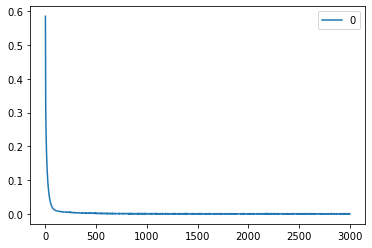

In [116]:
#val_loss = eval_metric(model, history.history, 'loss')
metric = history.history['loss']
val_metric = history.history['val_' + 'loss']

pd.DataFrame(val_metric).plot()

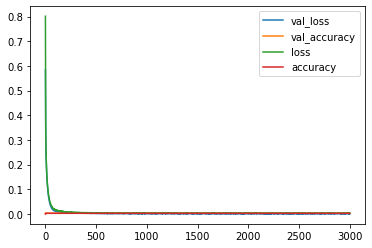

In [117]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()

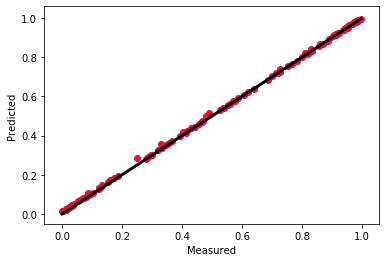

In [118]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

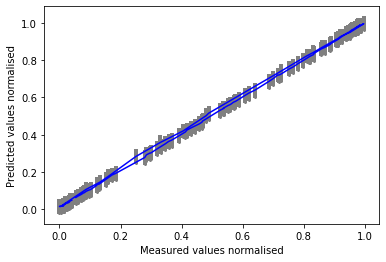

In [119]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [120]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)


In [121]:
y_pred_unscaled = pd.DataFrame(y_pred_unscaled)


In [122]:
y_test_unscaled = pd.DataFrame(y_test_unscaled)

In [123]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fad1d943b90>)

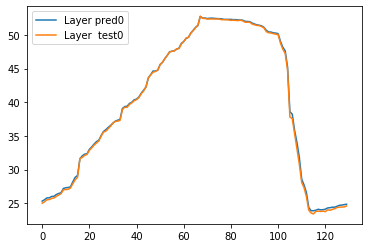

In [124]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

#fig.canvas.draw()
fig.show()
#fig.canvas.draw()
#plt.rcParams["figure.figsize"]=5,5
fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3

def plotyhat_ytest(df_yhat, y_test, ax, fig, alpha =0.7, scm=None):
    #ax.clear()
    #df= df.iloc[:, 1:]
    #df = df.iloc[:, 3:]
    for i in range (0, df_yhat.shape[1]):
        #print ('last shape[1] is:', df.shape[1])
        ax.plot(df_yhat.index, df_yhat.iloc[:, i],\
                label = 'Layer pred' + str(i))
        ax.plot(y_test.index, y_test.iloc[:, i],\
                label = 'Layer  test' + str(i))
        
    #fig.canvas.draw()
    #ax.legend()
    #fig.show()
    #print ('df is :', df)
    plt.legend(loc='upper left')
    return fig, ax
plotyhat_ytest(y_pred_unscaled,y_test_unscaled, ax, fig, alpha =0.7, scm=None)